In [676]:
from IPython.display import YouTubeVideo

from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [677]:
from matplotlib import __version__ as mplver


In [678]:
print("matplotlib version is:" , mplver)

matplotlib version is: 3.7.2


## Import preprocessed data

In [679]:
data = pd.read_csv("data_full.csv")

In [680]:
data.set_index("ID", inplace=True)

In [681]:
data.head()

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298          0   
10001  0.500000  0.500000              0.307692       1.182909          0   
10002  0.000000  0.007576             -0.507692      -0.472264          0   
10003 -1.166667 -1.492424             -0.276923      -0.030735          0   
10004  1.000000  1.780303              2.615385       0.785607          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  ...  Active_Period  \
ID                                       ...                  
10000             0.0               0.0  ...       0.000000   
10001             0.0               0.0  ...       0.989071   
10002             0.0               0.0  ...      -0.016393   
10003             1.0               0.0  ...       0.989071   
10004             0.0               0.0  ...      -0.016393   

       Contract_Duration  PercentageOfVisits  TotalNumberOfActivities  \
ID                                                                      
10000          -0.490868                1.15                      0.0   
10001           0.285388               -0.20                      0.0   
10002          -0.554795                0.50                      0.0   
10003          -0.257991                0.35                      0.0   
10004           1.152968               -0.50                      0.0   

       MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
ID                                                          
10000      3.017065             1.866571         0.763419   
10001      0.607509             0.104392        -0.204771   
10002      0.493905             0.000000         1.208748   
10003      0.176012             0.239981         0.463221   
10004     -0.611409             0.000000        -0.255467   

       Freq_Classes_Contract  Visits_ActivePeriod  Gender_Female  
ID                                                                
10000               9.579365            -0.201465              1  
10001               0.198413            -0.501832              1  
10002               0.000000             0.619048              0  
10003               0.992063            -0.300366              0  
10004               0.000000            -0.600733              0  

[5 rows x 32 columns]

In [682]:
data.columns

Index(['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'Active_Period',
       'Contract_Duration', 'PercentageOfVisits', 'TotalNumberOfActivities',
       'MonthlyValue', 'PercentageOfClasses', 'Freq_Visits_Day',
       'Freq_Classes_Contract', 'Visits_ActivePeriod', 'Gender_Female'],
      dtype='object')

In [683]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

non_metric_features = data.columns.drop(metric_features).to_list()

### SOM + K-means clustering

### Frequency Perspective

In [684]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

In [685]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    data[frequency_perspective].values, 
    mapsize=[50, 50],  # NEEDS TO BE A LIST
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)

## This will take a few minutes!
# sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)
sm.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)


 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50



 epoch: 1 ---> elapsed time:  7.973000, quantization error: 1.675041

 epoch: 2 ---> elapsed time:  5.257000, quantization error: 1.675586

 epoch: 3 ---> elapsed time:  6.479000, quantization error: 1.654050

 epoch: 4 ---> elapsed time:  6.927000, quantization error: 1.650963

 epoch: 5 ---> elapsed time:  7.092000, quantization error: 1.648059

 epoch: 6 ---> elapsed time:  7.501000, quantization error: 1.639033

 epoch: 7 ---> elapsed time:  7.357000, quantization error: 1.635237

 epoch: 8 ---> elapsed time:  7.485000, quantization error: 1.632359

 epoch: 9 ---> elapsed time:  7.749000, quantization error: 1.629551

 epoch: 10 ---> elapsed time:  7.949000, quantization error: 1.626640

 epoch: 11 ---> elapsed time:  7.913000, quantization error: 1.623580

 epoch: 12 ---> elapsed time:  7.327000, quantization error: 1.620347

 epoch: 13 ---> elapsed time:  7.366000, quantization error: 1.616917

 epoch: 14 ---> elapsed time:  5.905000, quantization error: 1.613280

 epoch: 15 --->

In [686]:
range_clusters = range(1, 7)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[frequency_perspective])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

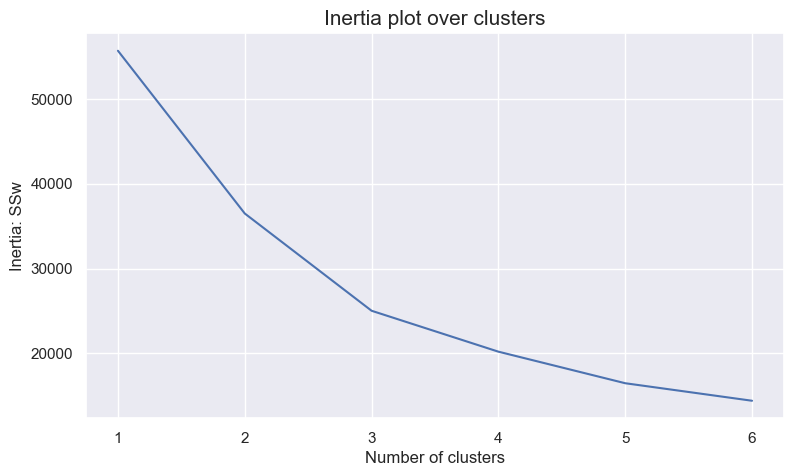

In [687]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

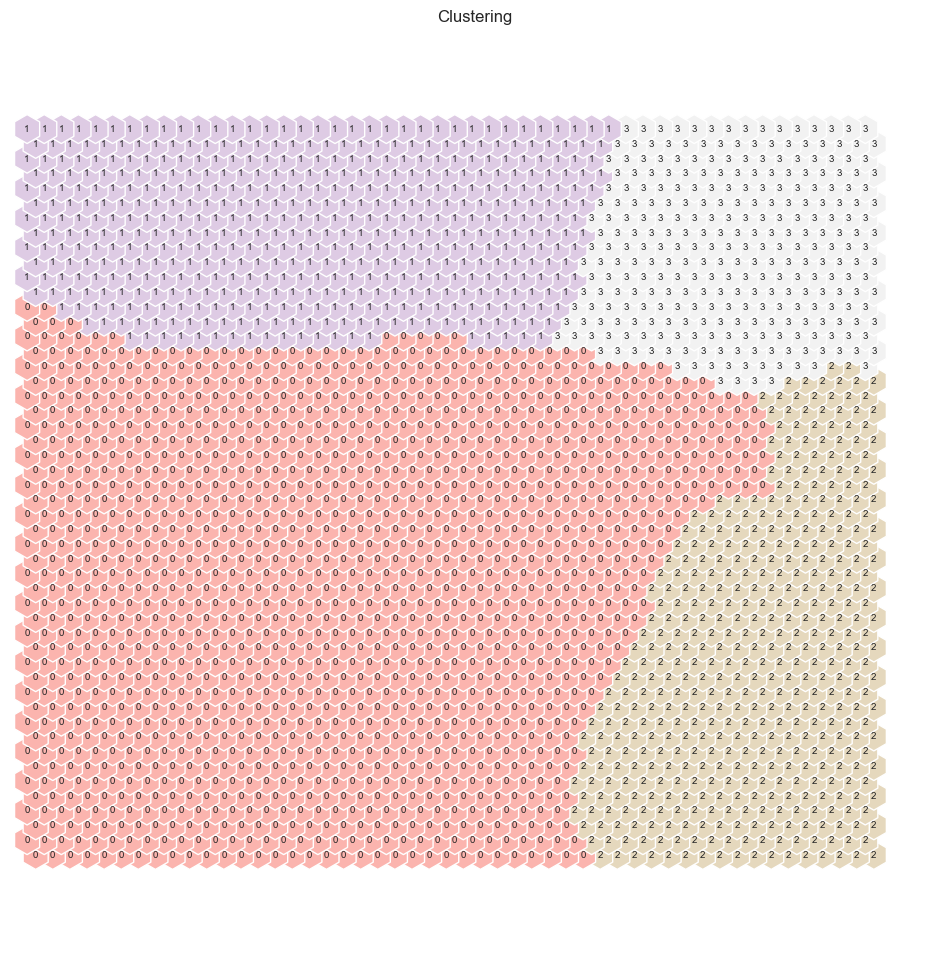

In [688]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

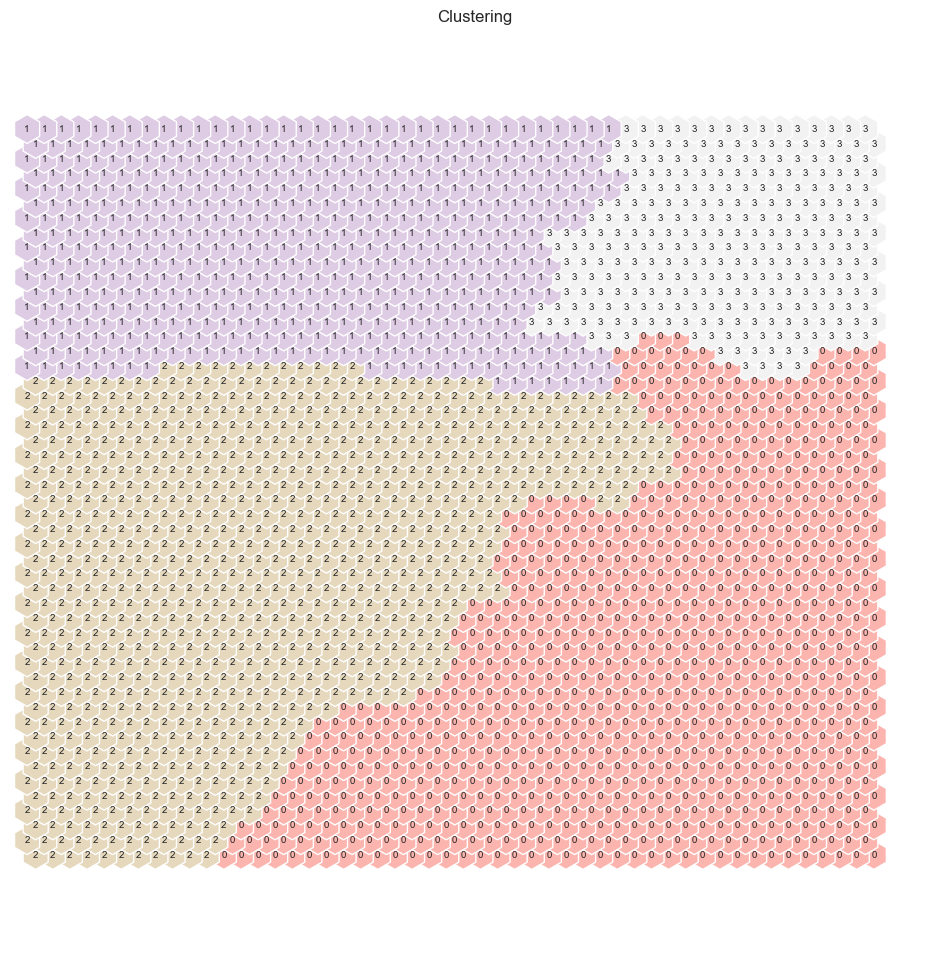

In [689]:

# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [690]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=frequency_perspective)
df_nodes['label'] = nodeclus_labels
df_nodes

PercentageOfVisits  PercentageOfClasses  Freq_Visits_Day  \
0               4.856085             1.410442         0.387514   
1               4.329669             1.392060         0.097724   
2               3.769752             1.441819        -0.045658   
3               3.311271             1.504499        -0.152561   
4               2.931991             1.477472        -0.249227   
...                  ...                  ...              ...   
2495           -0.867284            -0.569484        -0.278391   
2496           -0.869096            -0.571608        -0.318576   
2497           -0.870354            -0.571298        -0.349967   
2498           -0.870827            -0.568672        -0.374572   
2499           -0.871074            -0.556958        -0.394449   

      Visits_ActivePeriod  label  
0                1.073509      3  
1                0.619642      3  
2                0.387812      3  
3                0.129024      3  
4               -0.008412      3  
...                   ...    ...  
2495            -0.806206      2  
2496            -0.808073      2  
2497            -0.809347      2  
2498            -0.809824      2  
2499            -0.810069      2  

[2500 rows x 5 columns]

In [691]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(data[frequency_perspective])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU")
)
df_bmus

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298        0.0   
10001  0.500000  0.500000              0.307692       1.182909        0.0   
10002  0.000000  0.007576             -0.507692      -0.472264        0.0   
10003 -1.166667 -1.492424             -0.276923      -0.030735        0.0   
10004  1.000000  1.780303              2.615385       0.785607        0.0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757        0.0   
24938  1.333333  1.045455             -0.030769       0.675600        0.0   
24939 -0.250000 -0.121212             -0.584615      -0.449775        0.0   
24940  2.666667  2.143939             -0.569231       2.342579        0.0   
24941  0.750000  1.310606             -0.400000       2.833583        0.0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   
...                    ...              ...                ...   
24937                  0.0              1.0                0.0   
24938                  0.0              0.0                0.0   
24939                  0.0              0.0                1.0   
24940                  0.0              1.0                0.0   
24941                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  ...  Contract_Duration  \
ID                                       ...                      
10000             0.0               0.0  ...          -0.490868   
10001             0.0               0.0  ...           0.285388   
10002             0.0               0.0  ...          -0.554795   
10003             1.0               0.0  ...          -0.257991   
10004             0.0               0.0  ...           1.152968   
...               ...               ...  ...                ...   
24937             0.0               0.0  ...           1.997717   
24938             0.0               0.0  ...          -0.027397   
24939             0.0               0.0  ...          -0.554795   
24940             0.0               0.0  ...           0.767123   
24941             0.0               0.0  ...           2.038813   

       PercentageOfVisits  TotalNumberOfActivities  MonthlyValue  \
ID                                                                 
10000                1.15                      0.0      3.017065   
10001               -0.20                      0.0      0.607509   
10002                0.50                      0.0      0.493905   
10003                0.35                      0.0      0.176012   
10004               -0.50                      0.0     -0.611409   
...                   ...                      ...           ...   
24937                0.65                      0.0      0.585080   
24938               -0.25                      0.0      0.756216   
24939                0.85                      0.0      0.786446   
24940                1.70                      0.0      0.684544   
24941                0.55                      0.0     -0.127743   

       PercentageOfClasses  Freq_Visits_Day  Freq_Classes_Contract  \
ID                                                                   
10000             1.866571         0.763419               9.579365   
10001             0.104392        -0.204771               0.198413   
10002             0.000000         1.208748               0.000000   
10003             0.239981         0.463221 

In [692]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298        0.0   
10001  0.500000  0.500000              0.307692       1.182909        0.0   
10002  0.000000  0.007576             -0.507692      -0.472264        0.0   
10003 -1.166667 -1.492424             -0.276923      -0.030735        0.0   
10004  1.000000  1.780303              2.615385       0.785607        0.0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757        0.0   
24938  1.333333  1.045455             -0.030769       0.675600        0.0   
24939 -0.250000 -0.121212             -0.584615      -0.449775        0.0   
24940  2.666667  2.143939             -0.569231       2.342579        0.0   
24941  0.750000  1.310606             -0.400000       2.833583        0.0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   
...                    ...              ...                ...   
24937                  0.0              1.0                0.0   
24938                  0.0              0.0                0.0   
24939                  0.0              0.0                1.0   
24940                  0.0              1.0                0.0   
24941                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  ...  PercentageOfVisits  \
ID                                       ...                       
10000             0.0               0.0  ...                1.15   
10001             0.0               0.0  ...               -0.20   
10002             0.0               0.0  ...                0.50   
10003             1.0               0.0  ...                0.35   
10004             0.0               0.0  ...               -0.50   
...               ...               ...  ...                 ...   
24937             0.0               0.0  ...                0.65   
24938             0.0               0.0  ...               -0.25   
24939             0.0               0.0  ...                0.85   
24940             0.0               0.0  ...                1.70   
24941             0.0               0.0  ...                0.55   

       TotalNumberOfActivities  MonthlyValue  PercentageOfClasses  \
ID                                                                  
10000                      0.0      3.017065             1.866571   
10001                      0.0      0.607509             0.104392   
10002                      0.0      0.493905             0.000000   
10003                      0.0      0.176012             0.239981   
10004                      0.0     -0.611409             0.000000   
...                        ...           ...                  ...   
24937                      0.0      0.585080             2.056875   
24938                      0.0      0.756216             0.000000   
24939                      0.0      0.786446             0.000000   
24940                      0.0      0.684544             2.010559   
24941                      0.0     -0.127743             0.014159   

       Freq_Visits_Day  Freq_Classes_Contract  Visits_ActivePeriod  \
ID                                                                   
10000         0.763419               9.579365            -0.201465   
10001        -0.204771               0.198413            -0.501832   
10002         1.208748               0.000000             0.619048   
10003         0.46

In [693]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
label                                                                       
0      0.531659  0.451052              0.100839       0.348751   0.057757   
1      0.178589  0.079294              0.988677       0.399213   0.041673   
2      0.287695  0.277819              1.783815      -0.131908   0.093588   
3     -0.419453 -0.549773             -0.277643       1.564388   0.015805   

       AthleticsActivities  WaterActivities  FitnessActivities  \
label                                                            
0                 0.006436         0.155827           0.808604   
1                 0.008726         0.312321           0.481872   
2                 0.015598         0.091854           0.769497   
3                 0.001824         0.775076           0.092401   

       TeamActivities  RacketActivities  ...  Active_Period  \
label                                    ...                  
0            0.014566          0.002033  ...       0.301983   
1            0.087859          0.030841  ...       0.479518   
2            0.022530          0.000000  ...       0.173699   
3            0.071125          0.078419  ...       0.349557   

       Contract_Duration  PercentageOfVisits  TotalNumberOfActivities  \
label                                                                   
0               0.225450            0.549517                 0.097053   
1               0.286593           -0.252610                 0.094629   
2               0.490187           -0.225910                 0.081456   
3               0.719343            1.664802                 0.082067   

       MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
label                                                       
0          0.128126             0.019324         0.944606   
1          0.034518             0.709275        -0.270086   
2         -0.565399             0.000994        -0.627960   
3          0.578716             2.035311         0.247836   

       Freq_Classes_Contract  Visits_ActivePeriod  Gender_Female  
label                                                             
0                   0.144035             0.936504       0.579099  
1                   1.278750            -0.348986       0.615616  
2                   0.000385            -0.200157       0.639515  
3                   6.966223             0.614770       0.579939  

[4 rows x 32 columns]

In [694]:
cluster_means = df_final.groupby('label').mean()[frequency_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [695]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

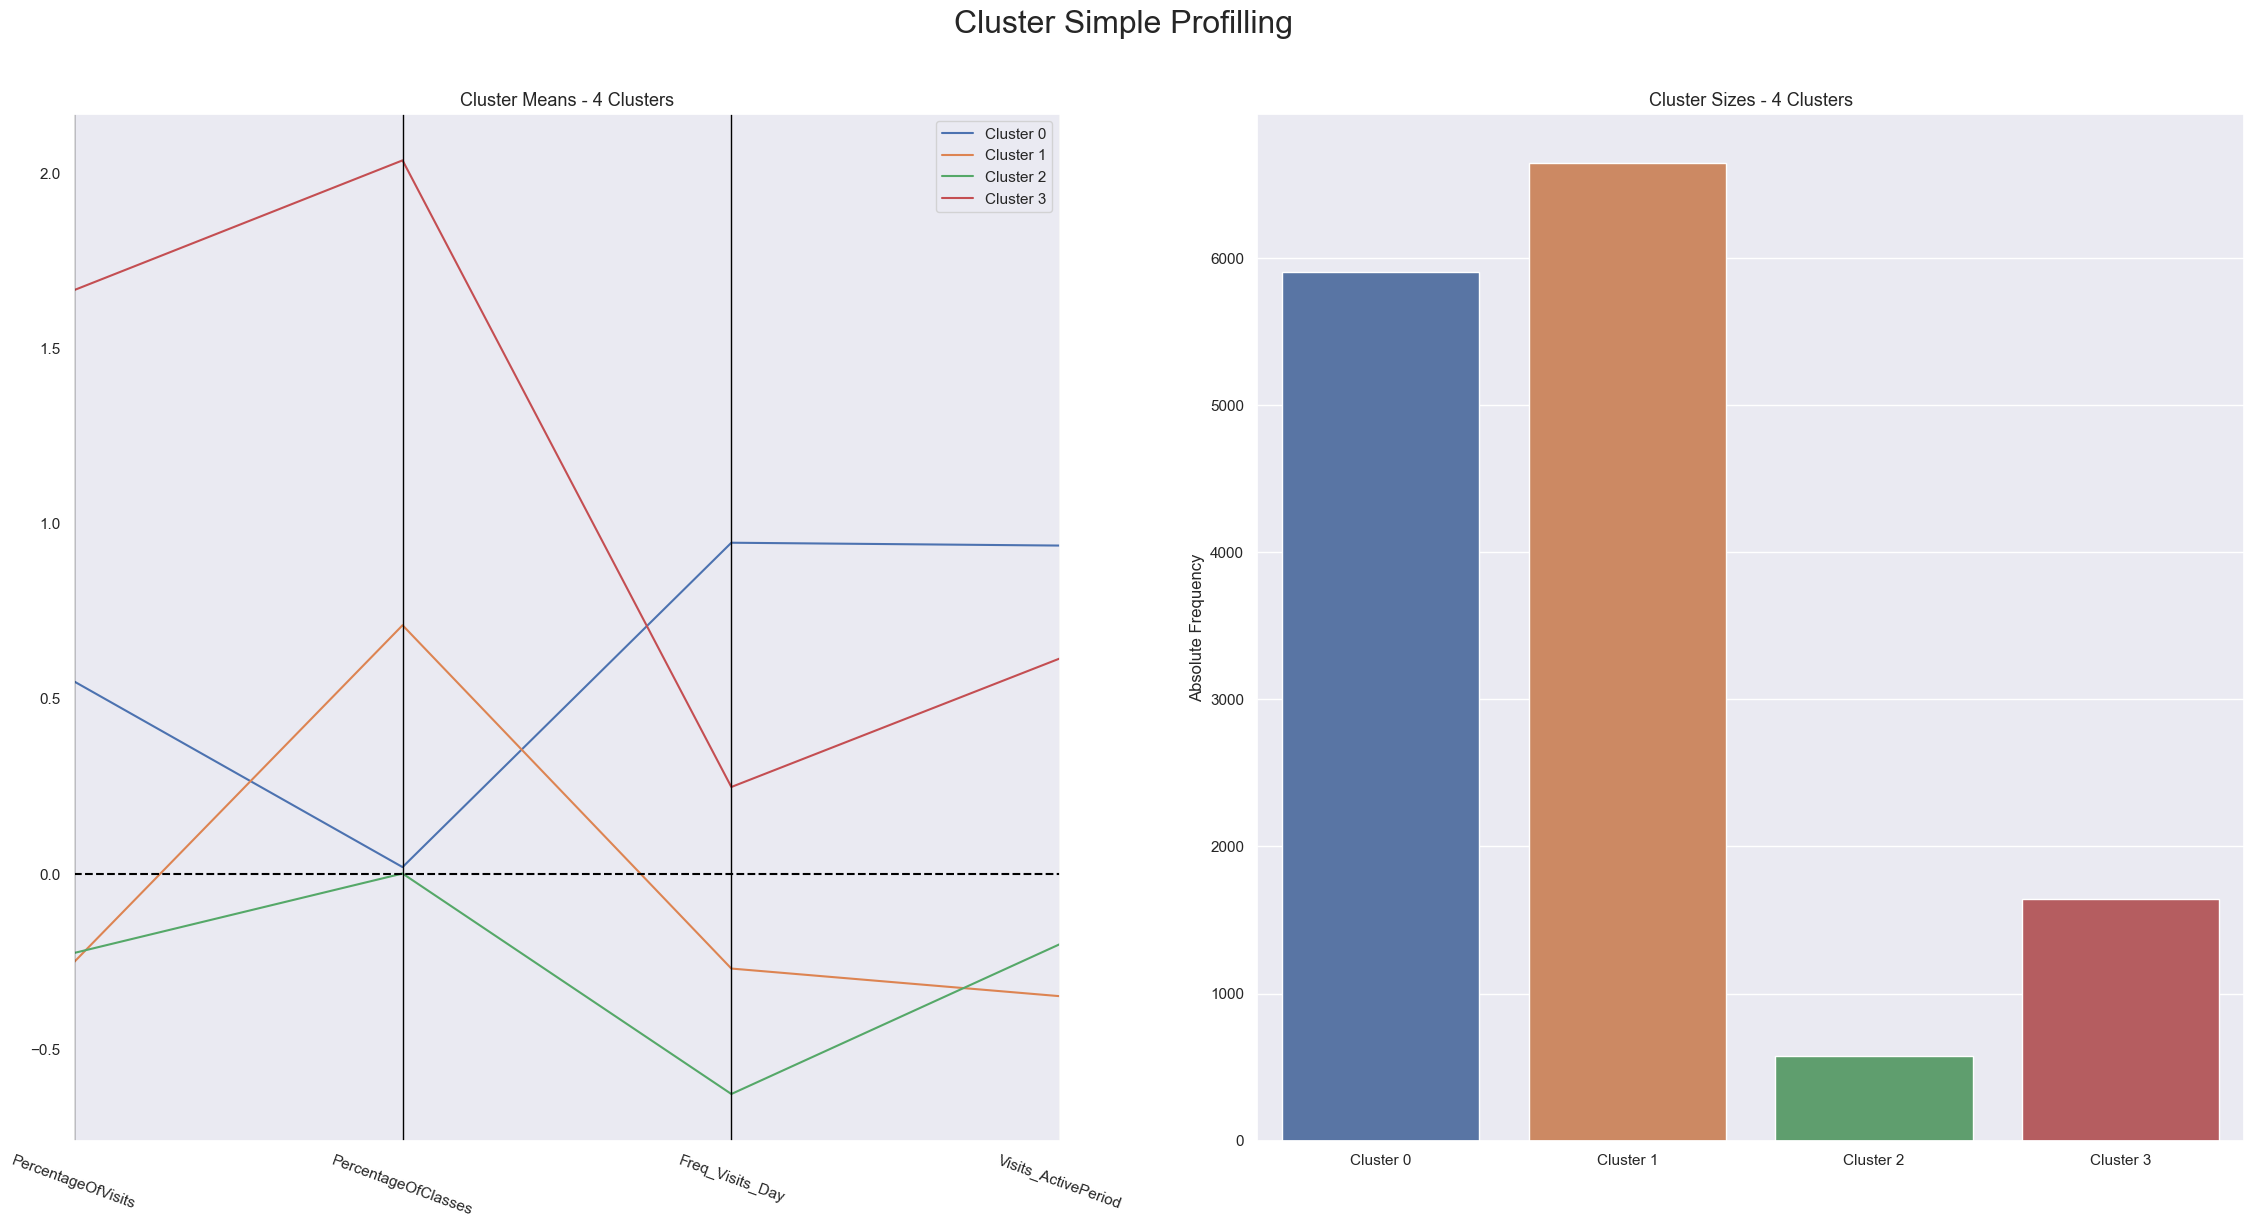

In [696]:
cluster_profiles(
    df = df_final[frequency_perspective + ["label"]], 
    label_columns = ["label"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Demographic Perspective

In [697]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [698]:
data.value_counts

<bound method DataFrame.value_counts of             Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298          0   
10001  0.500000  0.500000              0.307692       1.182909          0   
10002  0.000000  0.007576             -0.507692      -0.472264          0   
10003 -1.166667 -1.492424             -0.276923      -0.030735          0   
10004  1.000000  1.780303              2.615385       0.785607          0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757          0   
24938  1.333333  1.045455             -0.030769       0.675600          0   
24939 -0.250000 -0.121212             -0.584615      -0.449775          0   
24940  2.666667  2.143939             -0.569231       2.342579          0   
24941  0.750000  1.310606           

In [699]:
df_demographic.value_counts

<bound method DataFrame.value_counts of             Age  Active_Period  MonthlyValue  Contract_Duration
ID                                                             
10000  3.083333       0.000000      3.017065          -0.490868
10001  0.500000       0.989071      0.607509           0.285388
10002  0.000000      -0.016393      0.493905          -0.554795
10003 -1.166667       0.989071      0.176012          -0.257991
10004  1.000000      -0.016393     -0.611409           1.152968
...         ...            ...           ...                ...
24937 -0.750000       0.000000      0.585080           1.997717
24938  1.333333      -0.010929      0.756216          -0.027397
24939 -0.250000      -0.016393      0.786446          -0.554795
24940  2.666667       0.000000      0.684544           0.767123
24941  0.750000      -0.016393     -0.127743           2.038813

[14773 rows x 4 columns]>

In [700]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    data[demographic_perspective].values, 
    mapsize=[50, 50],  # NEEDS TO BE A LIST
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)

## This will take a few minutes!
# sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)
sm.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  6.315000, quantization error: 0.938497

 epoch: 2 ---> elapsed time:  6.437000, quantization error: 1.775370

 epoch: 3 ---> elapsed time:  6.241000, quantization error: 1.756748

 epoch: 4 ---> elapsed time:  6.409000, quantization error: 1.747916

 epoch: 5 ---> elapsed time:  6.226000, quantization error: 1.741325

 epoch: 6 ---> elapsed time:  6.849000, quantization error: 1.737288

 epoch: 7 ---> elapsed time:  6.169000, quantization error: 1.734772

 epoch: 8 ---> elapsed time:  6.547000, quantization error: 1.732573

 epoch: 9 ---> elapsed time:  6.871000, quantization error: 1.730341

 epoch: 10 ---> elapsed time:  6.514000, quantization error: 1.727998

 epoch: 11 ---> elapsed time:  7.030000, quantization error: 1.725521

 epoch: 12 ---> elapsed time:  6.175000, quantization error: 1.722853

 epoch: 13 ---> 

In [701]:
range_clusters = range(1, 10)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[demographic_perspective])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

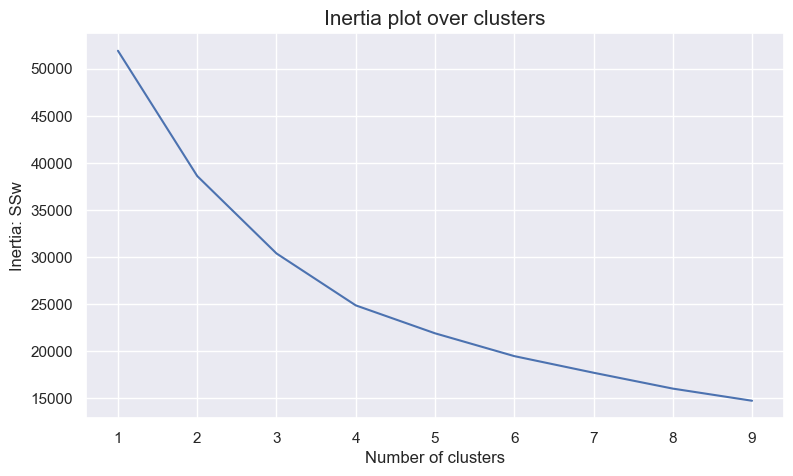

In [702]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

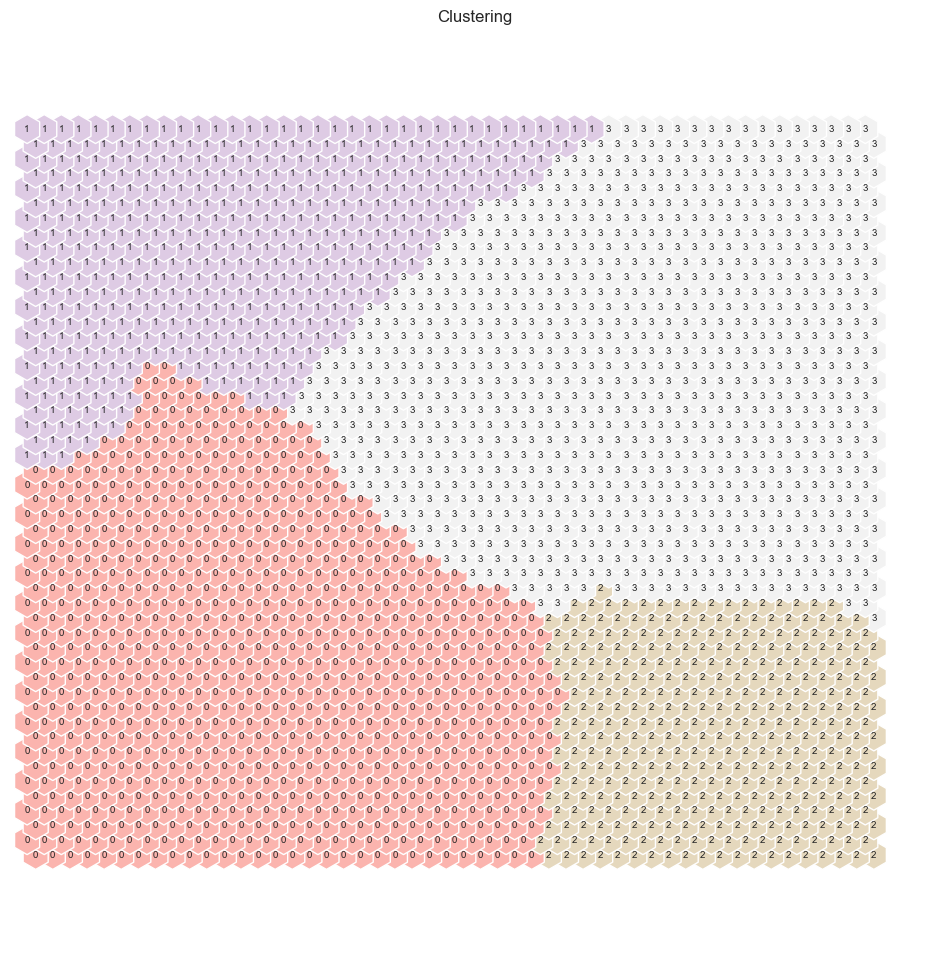

In [703]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

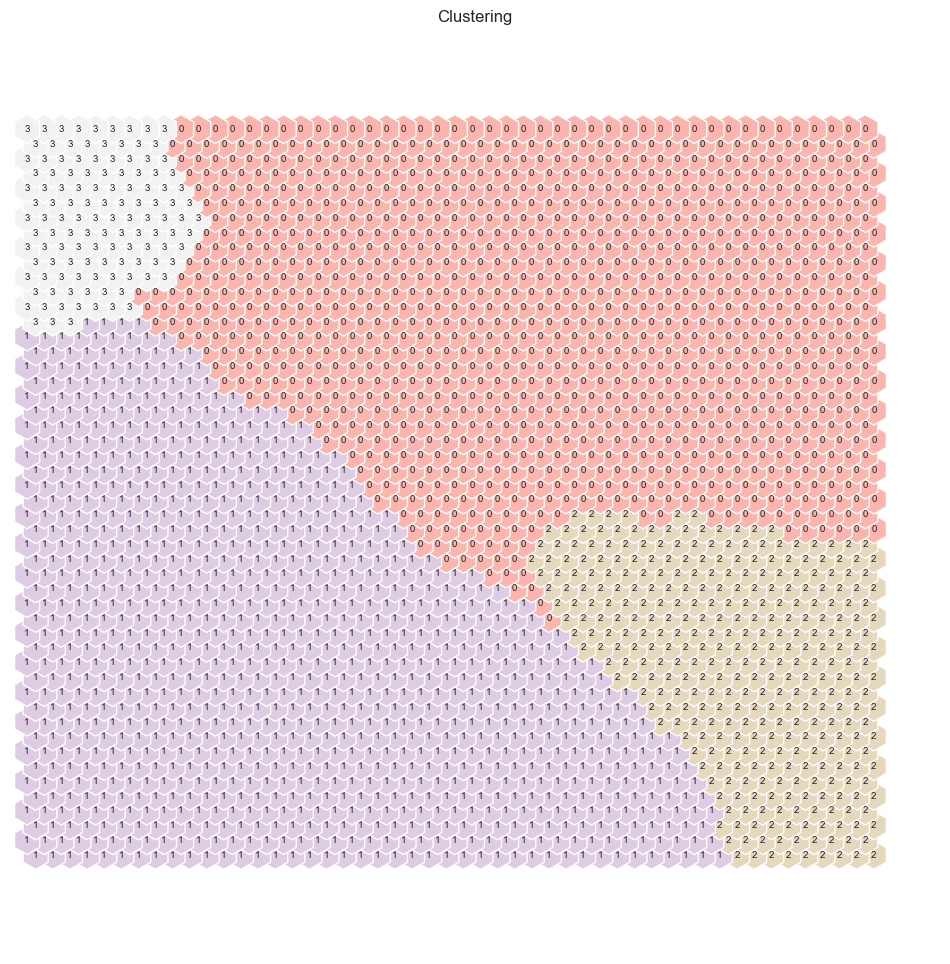

In [704]:

# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [705]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographic_perspective)
df_nodes['label'] = nodeclus_labels
df_nodes

Age  Active_Period  MonthlyValue  Contract_Duration  label
0    -1.566506      -0.704983      1.423992          -0.694391      0
1    -1.572654      -0.705162      1.221717          -0.652288      0
2    -1.514912      -0.705736      1.053151          -0.620743      0
3    -1.382485      -0.707670      0.919483          -0.584553      0
4    -1.169670      -0.711013      0.867627          -0.535001      0
...        ...            ...           ...                ...    ...
2495 -1.269056       1.113401     -0.145933          -0.234281      1
2496 -1.410221       1.113624     -0.087275          -0.245175      1
2497 -1.471694       1.113593      0.106627          -0.242452      1
2498 -1.537086       1.113397      0.303669          -0.278327      1
2499 -1.579204       1.113418      0.490634          -0.321609      1

[2500 rows x 5 columns]

In [706]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(data[demographic_perspective])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU")
)
df_bmus

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298        0.0   
10001  0.500000  0.500000              0.307692       1.182909        0.0   
10002  0.000000  0.007576             -0.507692      -0.472264        0.0   
10003 -1.166667 -1.492424             -0.276923      -0.030735        0.0   
10004  1.000000  1.780303              2.615385       0.785607        0.0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757        0.0   
24938  1.333333  1.045455             -0.030769       0.675600        0.0   
24939 -0.250000 -0.121212             -0.584615      -0.449775        0.0   
24940  2.666667  2.143939             -0.569231       2.342579        0.0   
24941  0.750000  1.310606             -0.400000       2.833583        0.0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   
...                    ...              ...                ...   
24937                  0.0              1.0                0.0   
24938                  0.0              0.0                0.0   
24939                  0.0              0.0                1.0   
24940                  0.0              1.0                0.0   
24941                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  ...  Contract_Duration  \
ID                                       ...                      
10000             0.0               0.0  ...          -0.490868   
10001             0.0               0.0  ...           0.285388   
10002             0.0               0.0  ...          -0.554795   
10003             1.0               0.0  ...          -0.257991   
10004             0.0               0.0  ...           1.152968   
...               ...               ...  ...                ...   
24937             0.0               0.0  ...           1.997717   
24938             0.0               0.0  ...          -0.027397   
24939             0.0               0.0  ...          -0.554795   
24940             0.0               0.0  ...           0.767123   
24941             0.0               0.0  ...           2.038813   

       PercentageOfVisits  TotalNumberOfActivities  MonthlyValue  \
ID                                                                 
10000                1.15                      0.0      3.017065   
10001               -0.20                      0.0      0.607509   
10002                0.50                      0.0      0.493905   
10003                0.35                      0.0      0.176012   
10004               -0.50                      0.0     -0.611409   
...                   ...                      ...           ...   
24937                0.65                      0.0      0.585080   
24938               -0.25                      0.0      0.756216   
24939                0.85                      0.0      0.786446   
24940                1.70                      0.0      0.684544   
24941                0.55                      0.0     -0.127743   

       PercentageOfClasses  Freq_Visits_Day  Freq_Classes_Contract  \
ID                                                                   
10000             1.866571         0.763419               9.579365   
10001             0.104392        -0.204771               0.198413   
10002             0.000000         1.208748               0.000000   
10003             0.239981         0.463221 

In [707]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298        0.0   
10001  0.500000  0.500000              0.307692       1.182909        0.0   
10002  0.000000  0.007576             -0.507692      -0.472264        0.0   
10003 -1.166667 -1.492424             -0.276923      -0.030735        0.0   
10004  1.000000  1.780303              2.615385       0.785607        0.0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757        0.0   
24938  1.333333  1.045455             -0.030769       0.675600        0.0   
24939 -0.250000 -0.121212             -0.584615      -0.449775        0.0   
24940  2.666667  2.143939             -0.569231       2.342579        0.0   
24941  0.750000  1.310606             -0.400000       2.833583        0.0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10000                  0.0              0.0                1.0   
10001                  0.0              0.0                0.0   
10002                  0.0              0.0                1.0   
10003                  0.0              0.0                0.0   
10004                  0.0              0.0                1.0   
...                    ...              ...                ...   
24937                  0.0              1.0                0.0   
24938                  0.0              0.0                0.0   
24939                  0.0              0.0                1.0   
24940                  0.0              1.0                0.0   
24941                  0.0              0.0                1.0   

       TeamActivities  RacketActivities  ...  PercentageOfVisits  \
ID                                       ...                       
10000             0.0               0.0  ...                1.15   
10001             0.0               0.0  ...               -0.20   
10002             0.0               0.0  ...                0.50   
10003             1.0               0.0  ...                0.35   
10004             0.0               0.0  ...               -0.50   
...               ...               ...  ...                 ...   
24937             0.0               0.0  ...                0.65   
24938             0.0               0.0  ...               -0.25   
24939             0.0               0.0  ...                0.85   
24940             0.0               0.0  ...                1.70   
24941             0.0               0.0  ...                0.55   

       TotalNumberOfActivities  MonthlyValue  PercentageOfClasses  \
ID                                                                  
10000                      0.0      3.017065             1.866571   
10001                      0.0      0.607509             0.104392   
10002                      0.0      0.493905             0.000000   
10003                      0.0      0.176012             0.239981   
10004                      0.0     -0.611409             0.000000   
...                        ...           ...                  ...   
24937                      0.0      0.585080             2.056875   
24938                      0.0      0.756216             0.000000   
24939                      0.0      0.786446             0.000000   
24940                      0.0      0.684544             2.010559   
24941                      0.0     -0.127743             0.014159   

       Freq_Visits_Day  Freq_Classes_Contract  Visits_ActivePeriod  \
ID                                                                   
10000         0.763419               9.579365            -0.201465   
10001        -0.204771               0.198413            -0.501832   
10002         1.208748               0.000000             0.619048   
10003         0.46

In [708]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
label                                                                       
0      0.429933  0.344306              0.444922       0.043006   0.031225   
1      0.216656  0.133639              0.766805       0.459728   0.061154   
2     -0.128470 -0.307254              0.398194       2.830056   0.078689   
3      0.022951 -0.026943             -0.286742      -0.171008   0.013211   

       AthleticsActivities  WaterActivities  FitnessActivities  \
label                                                            
0                 0.006310         0.207572           0.692768   
1                 0.007069         0.298701           0.543646   
2                 0.013770         0.616393           0.295738   
3                 0.005081         0.288618           0.541667   

       TeamActivities  RacketActivities  ...  Active_Period  \
label                                    ...                  
0            0.029930          0.008898  ...      -0.007686   
1            0.059839          0.036495  ...       0.903553   
2            0.131148          0.013770  ...      -0.000107   
3            0.051829          0.048780  ...       0.200070   

       Contract_Duration  PercentageOfVisits  TotalNumberOfActivities  \
label                                                                   
0              -0.064446            0.280116                 0.066009   
1               0.434037            0.146244                 0.090580   
2               1.920046            0.646885                 0.223607   
3              -0.475385            0.575203                 0.085366   

       MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
label                                                       
0          0.045857             0.351231         0.279710   
1         -0.143758             0.589487         0.168898   
2         -0.014778             1.282069         0.192730   
3          2.261400             0.472906         0.789479   

       Freq_Classes_Contract  Visits_ActivePeriod  Gender_Female  
label                                                             
0                   0.872908             0.458199       0.633069  
1                   1.414173            -0.035405       0.591649  
2                   3.219391             0.634989       0.496393  
3                   1.933395             0.528552       0.574187  

[4 rows x 32 columns]

In [709]:
cluster_means = df_final.groupby('label').mean()[demographic_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [710]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

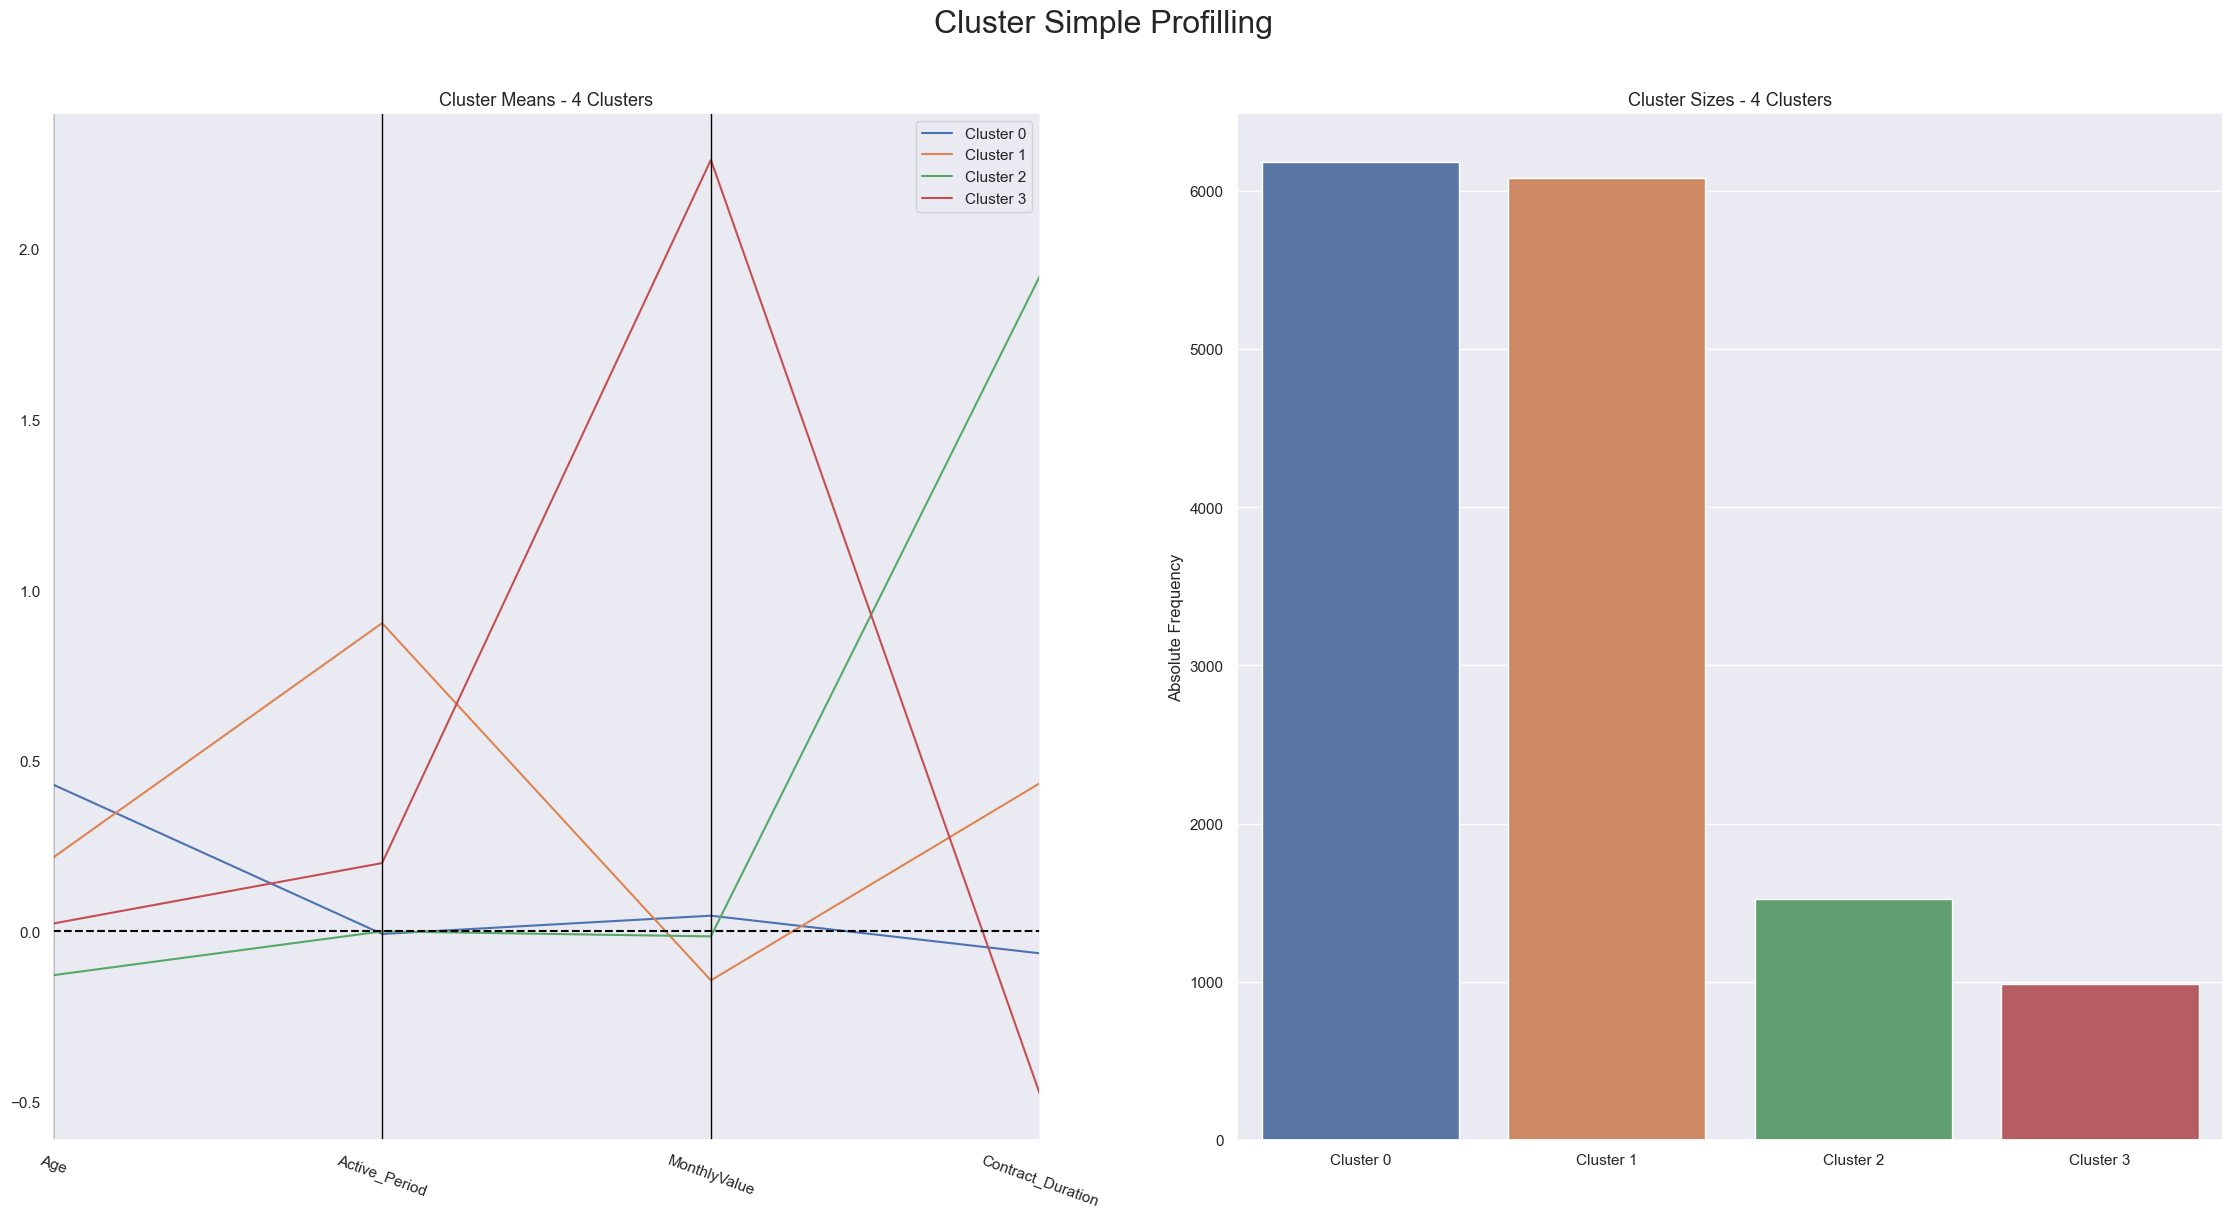

In [711]:
cluster_profiles(
    df = df_final[demographic_perspective + ["label"]], 
    label_columns = ["label"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Geral

In [712]:
# This som implementation does not have a random seed parameter
# We're going to set it up ourselves
np.random.seed(42)

# Notice that the SOM did not converge - We're under a time constraint for this class
sm = sompy.SOMFactory().build(
    data[metric_features].values, 
    mapsize=[50, 50],  # NEEDS TO BE A LIST
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)

## This will take a few minutes!
# sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)
sm.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  5.462000, quantization error: 1.897285

 epoch: 2 ---> elapsed time:  3.602000, quantization error: 2.154029

 epoch: 3 ---> elapsed time:  3.013000, quantization error: 2.135597

 epoch: 4 ---> elapsed time:  3.261000, quantization error: 2.129141

 epoch: 5 ---> elapsed time:  3.453000, quantization error: 2.124445

 epoch: 6 ---> elapsed time:  3.378000, quantization error: 2.121970

 epoch: 7 ---> elapsed time:  3.986000, quantization error: 2.119714

 epoch: 8 ---> elapsed time:  4.732000, quantization error: 2.117338

 epoch: 9 ---> elapsed time:  3.133000, quantization error: 2.114679

 epoch: 10 ---> elapsed time:  2.849000, quantization error: 2.111622

 epoch: 11 ---> elapsed time:  3.419000, quantization error: 2.108102

 epoch: 12 ---> elapsed time:  4.847000, quantization error: 2.104811

 epoch: 13 ---> 

In [713]:
range_clusters = range(1, 10)

inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[demographic_perspective])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

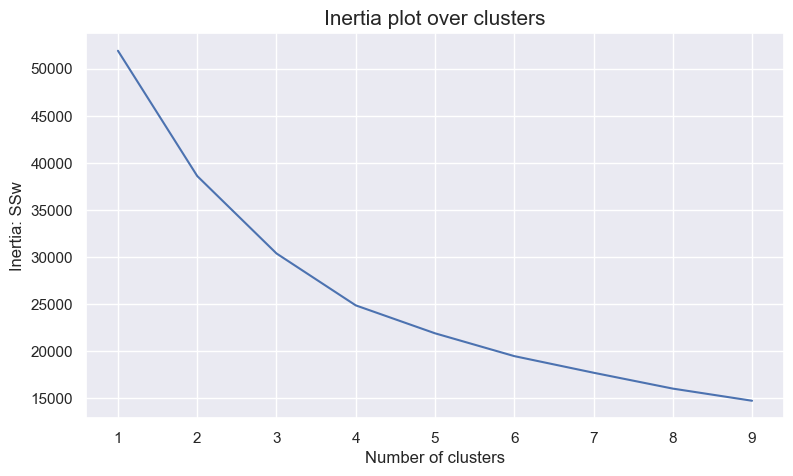

In [714]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

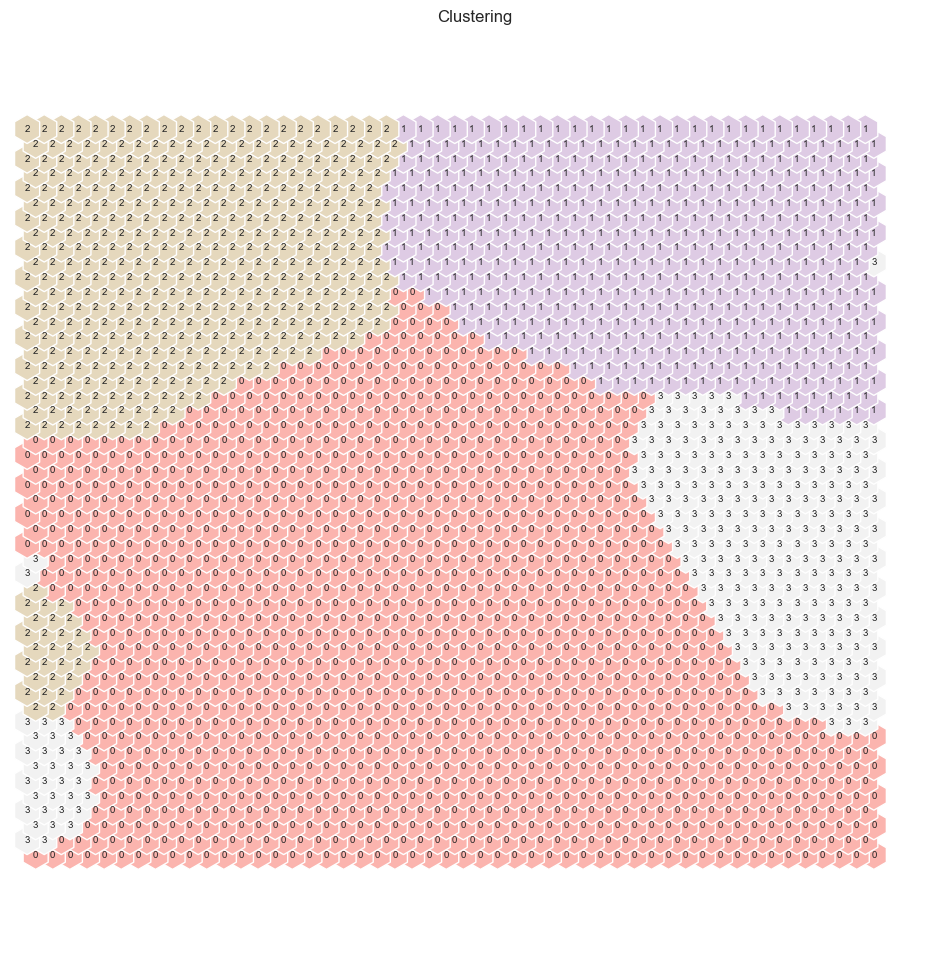

In [715]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

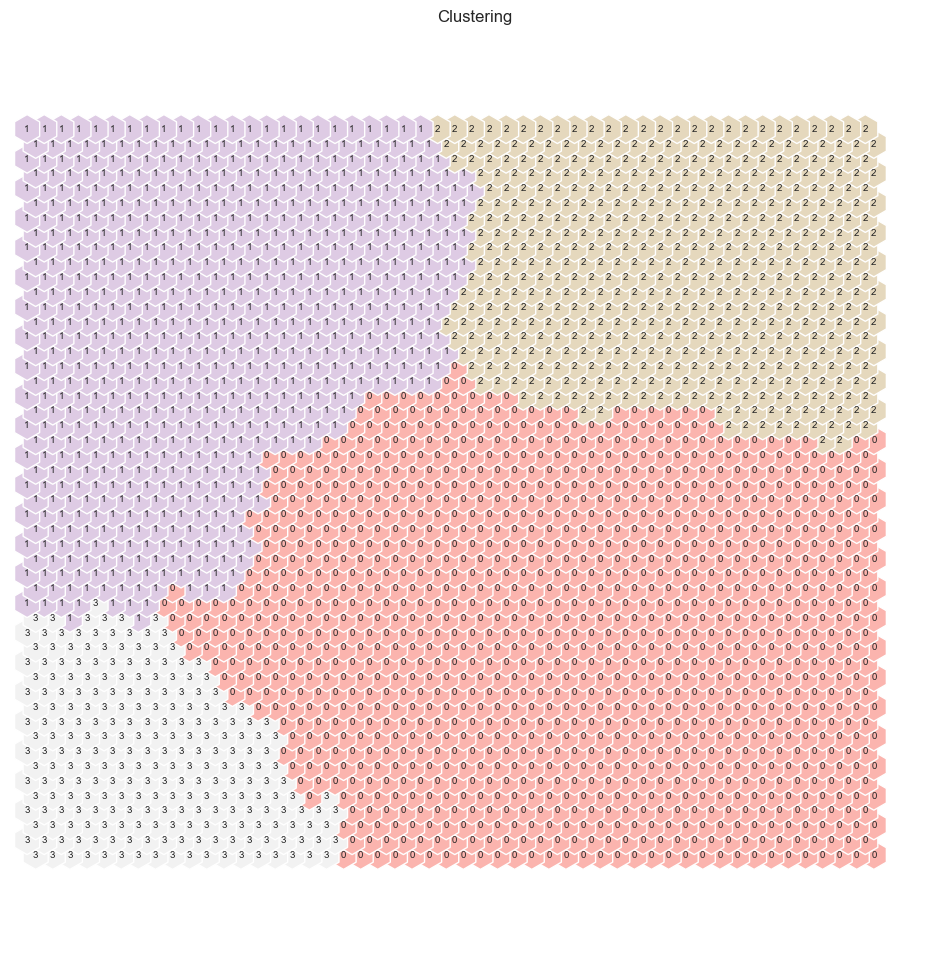

In [716]:

# Perform Hierarchical clustering on top of the 2500 units (sm.get_node_vectors() output)
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)
sm.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [717]:
# Check the nodes and and respective clusters
nodes = sm.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographic_perspective)
df_nodes['label'] = nodeclus_labels
df_nodes

ValueError: Shape of passed values is (2500, 6), indices imply (2500, 4)

In [ ]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(data[metric_features])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU")
)
df_bmus

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10002  0.000000        0.0                  0.0              0.0   
10005  0.083333        0.0                  0.0              0.0   
10008  0.500000        0.0                  0.0              0.0   
10010 -0.250000        0.0                  0.0              0.0   
10011  0.500000        1.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24934 -0.166667        0.0                  0.0              0.0   
24935  0.000000        0.0                  0.0              0.0   
24936 -0.166667        0.0                  0.0              0.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10002                1.0             0.0               0.0               0.0   
10005                1.0             0.0               0.0               0.0   
10008                0.0             0.0               0.0               1.0   
10010                1.0             0.0               0.0               0.0   
10011                1.0             0.0               0.0               1.0   
...                  ...             ...               ...               ...   
24934                1.0             0.0               0.0               0.0   
24935                1.0             0.0               0.0               0.0   
24936                0.0             0.0               0.0               1.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  PercentageOfVisits  \
ID                                         ...                       
10002                0.0              0.0  ...                0.20   
10005                0.0              0.0  ...                0.44   
10008                0.0              0.0  ...                0.00   
10010                0.0              0.0  ...                0.05   
10011                0.0              0.0  ...                0.46   
...                  ...              ...  ...                 ...   
24934                0.0              0.0  ...                0.00   
24935                0.0              0.0  ...                0.00   
24936                0.0              0.0  ...                0.02   
24938                0.0              0.0  ...                0.05   
24939                0.0              0.0  ...                0.27   

       TotalNumberOfActivities  MonthlyValue  PercentageOfClasses  \
ID                                                                  
10002                      1.0         37.60                  0.0   
10005                      1.0         20.00                  0.0   
10008                      1.0         16.35                  0.0   
10010                      1.0         13.18                  0.0   
10011                      2.0         28.34                  0.0   
...                        ...           ...                  ...   
24934                      1.0         25.20                  0.0   
24935                      1.0         19.08                  0.0   
24936                      1.0         13.83                  0.0   
24938                      1.0         42.98                  0.0   
24939                      1.0         43.60                  0.0   

       Freq_Visits_Day  Freq_Classes_Contract  Visits_ActivePeriod  \
ID                                                                   
10002           0.2000                    0.0               0.0333   
10005           0.1152                    0.0               0.0712 

In [ ]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

Age  UseByTime  AthleticsActivities  WaterActivities  \
ID                                                                 
10002  0.000000        0.0                  0.0              0.0   
10005  0.083333        0.0                  0.0              0.0   
10008  0.500000        0.0                  0.0              0.0   
10010 -0.250000        0.0                  0.0              0.0   
10011  0.500000        1.0                  0.0              0.0   
...         ...        ...                  ...              ...   
24934 -0.166667        0.0                  0.0              0.0   
24935  0.000000        0.0                  0.0              0.0   
24936 -0.166667        0.0                  0.0              0.0   
24938  1.333333        0.0                  0.0              0.0   
24939 -0.250000        0.0                  0.0              0.0   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
ID                                                                             
10002                1.0             0.0               0.0               0.0   
10005                1.0             0.0               0.0               0.0   
10008                0.0             0.0               0.0               1.0   
10010                1.0             0.0               0.0               0.0   
10011                1.0             0.0               0.0               1.0   
...                  ...             ...               ...               ...   
24934                1.0             0.0               0.0               0.0   
24935                1.0             0.0               0.0               0.0   
24936                0.0             0.0               0.0               1.0   
24938                0.0             0.0               0.0               1.0   
24939                1.0             0.0               0.0               0.0   

       SpecialActivities  OtherActivities  ...  TotalNumberOfActivities  \
ID                                         ...                            
10002                0.0              0.0  ...                      1.0   
10005                0.0              0.0  ...                      1.0   
10008                0.0              0.0  ...                      1.0   
10010                0.0              0.0  ...                      1.0   
10011                0.0              0.0  ...                      2.0   
...                  ...              ...  ...                      ...   
24934                0.0              0.0  ...                      1.0   
24935                0.0              0.0  ...                      1.0   
24936                0.0              0.0  ...                      1.0   
24938                0.0              0.0  ...                      1.0   
24939                0.0              0.0  ...                      1.0   

       MonthlyValue  PercentageOfClasses  Freq_Visits_Day  \
ID                                                          
10002         37.60                  0.0           0.2000   
10005         20.00                  0.0           0.1152   
10008         16.35                  0.0           0.0141   
10010         13.18                  0.0           0.0386   
10011         28.34                  0.0           0.3094   
...             ...                  ...              ...   
24934         25.20                  0.0           0.0156   
24935         19.08                  0.0           0.2065   
24936         13.83                  0.0           0.0412   
24938         42.98                  0.0           0.2184   
24939         43.60                  0.0           0.2000   

       Freq_Classes_Contract  Visits_ActivePeriod  Gender_Female  \
ID                                                                 
10002                    0.0               0.0333            0.0   
10005                    0.0               0.0712            1.0   
10008                    0.0               0

In [ ]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

Age  UseByTime  AthleticsActivities  WaterActivities  \
label                                                              
0      0.288795   0.031367             0.008114         0.143757   
1      0.378297   0.021583             0.000000         0.546763   
2      0.265716   0.135965             0.008772         0.111842   

       FitnessActivities  TeamActivities  RacketActivities  CombatActivities  \
label                                                                          
0               0.731379        0.019741          0.004602          0.130314   
1               0.338129        0.043165          0.014388          0.093525   
2               0.813596        0.024123          0.000000          0.160088   

       SpecialActivities  OtherActivities  ...  Contract_Duration  \
label                                      ...                      
0               0.009083         0.000727  ...         195.475960   
1               0.028777         0.000000  ...          47.273381   
2               0.021930         0.002193  ...         626.546053   

       PercentageOfVisits  TotalNumberOfActivities  MonthlyValue  \
label                                                              
0                0.125595                 1.047717     29.532456   
1                0.271079                 1.064748    113.677266   
2                0.138443                 1.142544     16.306425   

       PercentageOfClasses  Freq_Visits_Day  Freq_Classes_Contract  \
label                                                                
0                 2.750849         0.111566               0.001629   
1                17.985612         0.197655               0.020671   
2                 0.010921         0.097853               0.000013   

       Visits_ActivePeriod  Gender_Female  dbscan_labels  
label                                                     
0                 0.023307       0.622139       2.513746  
1                 0.041837       0.539568       8.366906  
2                 0.031293       0.563596      21.326754  

[3 rows x 24 columns]

In [ ]:
cluster_means = df_final.groupby('label').mean()[metric_features].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

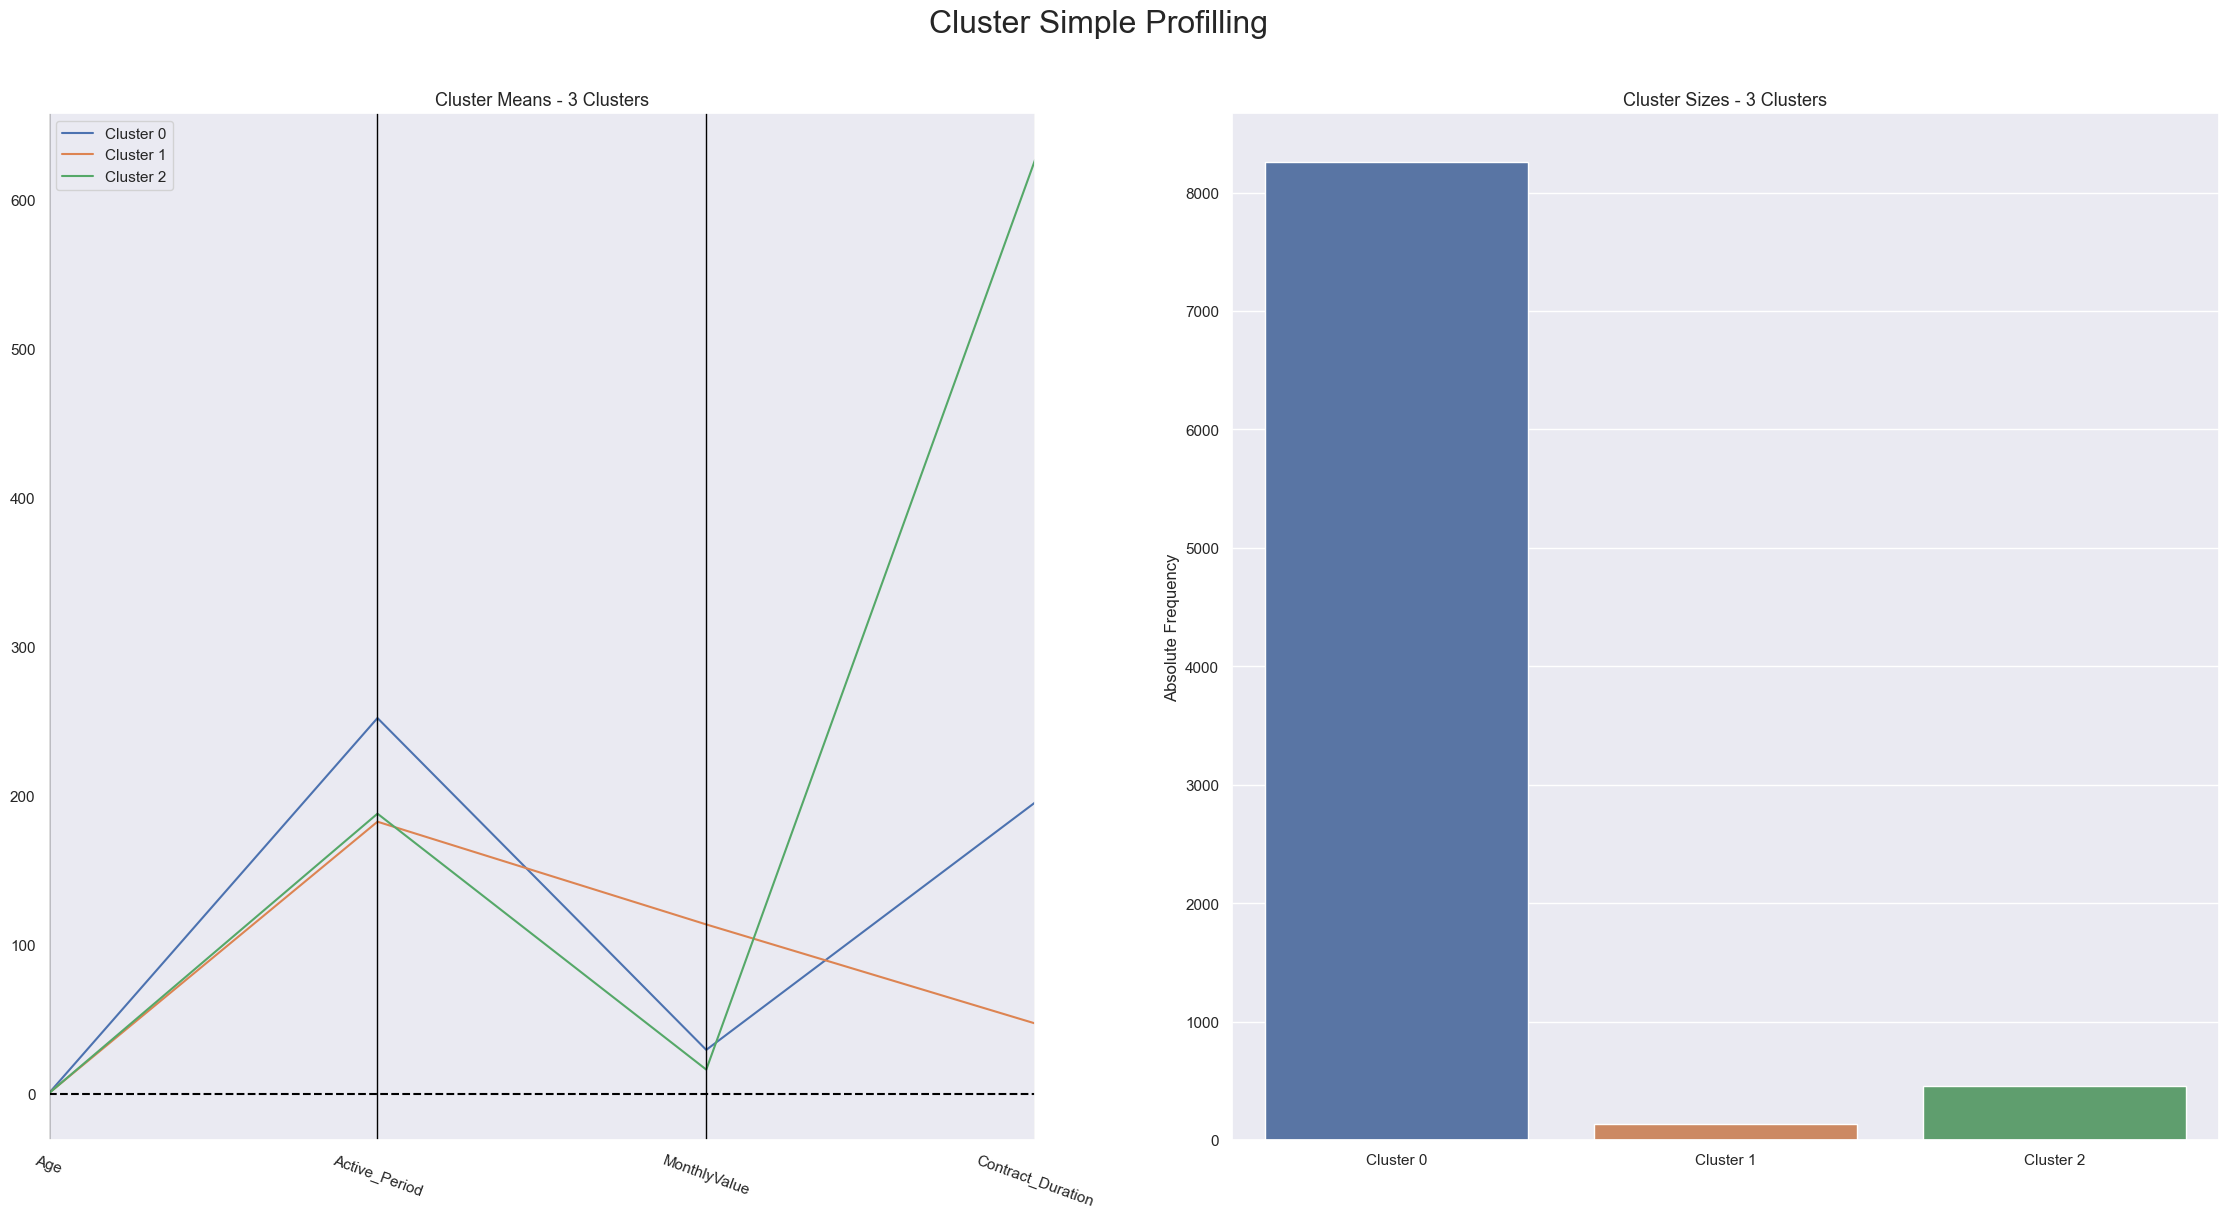

In [ ]:
cluster_profiles(
    df = df_final[metric_features + ["label"]], 
    label_columns = ["label"], 
    figsize = (28, 13), 
    compar_titles = [""]
)